# Lesson 10: LOLs (Learning Other Libraries)

**A.K.A. OPP (Other People's Packages)**

Note: Not real acronyms in the Python community

This week's lesson is intended to introduce you to some great Python libraries for engineering and also some of general interest.

* __Libraries__: Python packages intended to be used in other Python code
* __Applications__: Python packages intended to be used as stand-alone programs

(Although these are not mutually exclusive)

**While some of these libraries may appear to do _magical_ things, they are all just Python functions and/or Python classes that have been combined together to be really useful.**

## `IPython` (Jupyter libraries)

[Documentation](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

Jupyter used to be called "IPython Notebook" and Jupyter, an application, still uses some of the IPython libraries. Some useful ones are in `IPython.display`:

```python
from IPython.display import Markdown, Latex, SVG, Audio, display
import IPython.display
```

These objects (with Capitalized names) accept string inputs to display rich media:

* `Markdown` - Accepts markdown strings
* `SVG` - Accepts SVG (scalable vector graphics) code as a string
* `Latex` - Accepts Latex code as a string

Can use the `display` function (lower case) to show each item in your notebook.

How to use this? Here is a simple but useful example:

```python
def title_block(proj="", proj_id="", designer="") -> None:
    """
    Returns None. Displays a simple title block in markdown containing
    'proj', 'proj_id', and 'designer'.
    """
    proj_line = f"**Project: {proj.title()}**"
    proj_id_line = f"**Project ID: {proj_id.upper()}**"
    designer_line = f"**Designer: {designer.upper()}**"
    markdown_obj = Markdown(
        "<br>".join(
            [proj_line, proj_id_line, designer_line]
        )
    )
    display(markdown_obj)
```

## `shapely`

[Documentation](https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects)

Shapely is an excellent library for creating, manipulating, and querying 2D geometry. 

```python
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
```

There is more to `shapely` than these three classes (you can tell they are classes because they are Capitalized) but these are a good place to start.

```python
my_point = Point([24, 32])
my_line = LineString([my_point, [50, 50]])
my_polygon = Polygon([[0,0], [-10, 8], [4, 18], [10, 13], [4, -12]])
```
                

In [25]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

my_point = Point([3, 3])
my_line = LineString([my_point, [50, 50]])
my_polygon = Polygon([[0,0], [-10, 8], [4, 18], [10, 13], [4, -12]])
my_other_polygon = my_point.buffer(8)

## `numpy`

[Documentation](https://numpy.org/doc/stable/index.html)

`numpy` is an important library in the Python scientific eco-system. It is based on the commercial software, MATLAB, and it has a similar "API" (Application Programming Interface). This means that the function names and method names are mostly the same names as the ones used in MATLAB, so if you already know MATLAB it's easy to transition to `numpy`.

In short, `numpy` is a library that provides data types for vector arrays of numbers and also multi-dimensional matrix arrays of numbers. There are also many functions to manipulate these arrays. 

Many scientific computing libraries in the Python eco-system are designed to work with `numpy` arrays or are directly built on `numpy`. Originally written by "rogue" graduate students (often without computer science backgrounds), `numpy` has gone on to be used in the analysis of gravitational waves and was directly cited in the imaging of the M87 blackhole. 

Using `numpy` is very fast, even for large amounts of data because much of `numpy` is actually implemented in FORTRAN or C.

For anyone who loves MATLAB and wishes they could use it, [here is a handy reference guide](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) for switching between MATLAB and `numpy`.

```python
import numpy as np # This is how it is conventionally imported
```

From there:

```python
my_array = np.array([6, 3, 5])
my_other_array = np.array([2.3, 4.5, 3.2,])
my_third_array = np.array([1.1, 2.2, 3.3])
my_matrix = np.matrix([my_array, my_other_array, my_third_array])
```

Also:
```python
sample_rate = 44100
t = np.linspace(0, 5, 5*sample_rate)
audio_data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
Audio(data,rate=sample_rate)
```

## `pandas`

[Documentation](https://pandas.pydata.org/pandas-docs/stable/)

pandas is a library whose goal is to become "the most powerful and flexible open source data analysis / manipulation tool available in any language". 

It was created by guy called Wes McKinney who developed it working in finance for AQR Capital Management. When he left the firm, they granted permission to him to take it open source (meaning it's developed by a community of volunteers). 

It currently also receives funding from a charity called [NUMFocus](https://numfocus.org/).

```python
import pandas as pd # <- Conventional way to import
```

### Main components of `pandas`
1. `Series` data type (similar to a one-layer-deep dictionary), which comes with many methods
2. `DataFrame` data type (a representation of tabular data), which comes with even more methods
3. Functions to manipulate `Series` and `DataFrame` objects

Each row, or record, in a `DataFrame` is a `Series`.

A basic example:
```python
import pandas as pd
column_names = ["Make", "Model", "Year"]
my_cars = [
    ["Honda", "Civic", 1994],
    ["Honda", "Accord", 1999],
    ["Honda", "Element", 2007],
]
df = pd.DataFrame(data=my_cars, columns=column_names)
```

More often though, we just read data directly from files and manipulate it.

```python
df = pd.read_csv("zurich_dogs.csv")
breed_mask = df["Primary Breed"] == "Yorkshire Terrier"
gender_guardian_mask = df["Gender, Guardian"] == "w"
df[breed_mask & gender_guardian_mask]
```

In pandas, we use the concept of a "boolean mask" to effectively and efficiently select data from the DataFrame. More on this later.

In this example, I wanted to find all rows where the data in the column "Primary Breed" was equal to the value "Yorkshire Terrier". After, I created another mask to find all of the rows in the DataFrame whose value in the column "Gender, Guardian" matched the value "w".

I then used the _intersection_ operator, `&` (also known as "Bit-wise AND"), to select the rows where both masks have a value of `True`.

We will cover how to use `pandas` more, later in this lesson.

## `pint` and/or `forallpeople`

* `pint` [documentation](https://pint.readthedocs.io/en/stable/)
* `forallpeople` [documentation](https://github.com/connorferster/forallpeople/)

`pint` is a library created to handle calculations with _any_ kind of unit and have the calculations be dimensionally consistent. For example, it can work with lengths in meters, inches, feet, furlongs, leagues, nautical miles...you name it. It is also designed to work well with `numpy` and `pandas`. Additionally, it can carry uncertainties in those measurements, too. `pint` is excellent and is maintained by a community of contributors.

`forallpeople` is a library that I created to also handle calculations but only ones that are based on SI (Standard Internationale) units (such as US Customary units). Whereas `pint` is the preferred library for doing any kind of physics, `forallpeople` is designed for the "working engineer" and so requires a lot less setup.

I will only be doing a demonstration with `forallpeople`.

```python
import forallpeople
forallpeople.environment('structural', top_level=True)
```

When using the `.environment()` function, you are importing all of the units specified in the `structural.json` file into the top-level namespace. The units currently in the top-level namespace can be reviewed by running `forallpeople.environment()` (with no arguments) at any time.

```python
a = 5*kN
b = 10*m
c = a*b
print(c)
d = c / (5*m**3)
print(d)
```

You can also use `forallpeople` in `pandas`.

```python
matrix_of_random_numbers = np.random.randint(0,100,size=(20, 4))
df = pd.DataFrame(matrix_of_random_numbers, columns=list('ABCD'))
df["A"] = df["A"]*lbs
df["B"] = df["B"]*ft
df["C"] = df["C"]*kPa
df["D"] = df["D"]*mm**2

# Create a new column based on columns "A" and "B"
df["E"] = df["A"] *df["B"]
```

## `handcalcs`

I created `handcalcs` to make performing calculations in Jupyter much more intuitive and reportable. As far as I know, there is nothing else like it in the Python eco-system. It currently has thousands of users and has been featured on Python podcasts.

```python
import handcalcs.render
```

This imports the `%%render` "cell magic" into your notebook.

```python
%%render
a = 5
b = 3
c = a + b
```

It also works well with `forallpeople`:
```python
%%render
phi = 0.9
F_y = (350*MPa)
Z = (120000*mm**3)
M_r = phi * F_y * Z
```

## `comtypes`

`comtypes` is a Windows-specific library that allows Python to connect with open Windows programs through that program's "COM interface". In order for this to work, a program has to be specifically written to "expose" it's COM interface. Luckily both SAP 2000 and ETABS expose the COM interface (SAFE does not).

Because this is a Windows-specific library, we cannot run it on the Jupyter server (which runs on Ubuntu Linux). We have to run it on our local machine, which requires your own local Anaconda Python installation.

### Connecting to SAP/ETABS

To learn how to connect to SAP or ETABS, you can find the "ETABS API Reference" document inside the directory where the actual program executable is located. It looks like this:

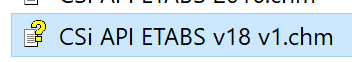

Double click it to open it and look for the Python examples:
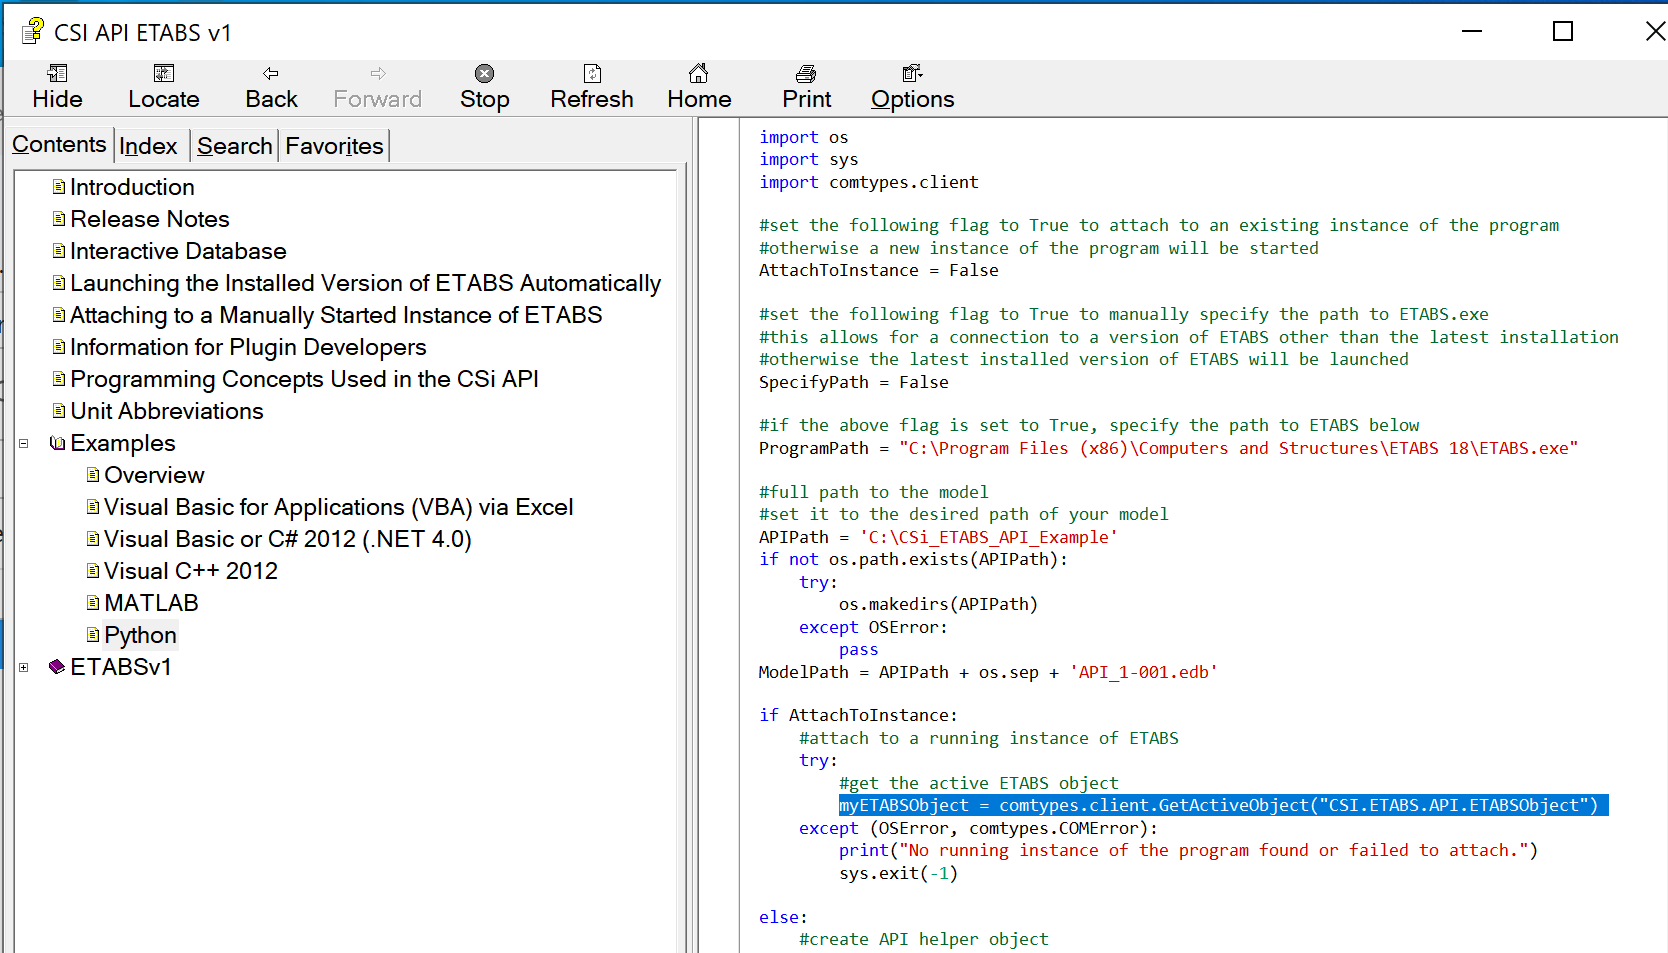

The example actually shows about three different ways of connecting to an ETABS file. The highlighted line is a way that I find to be most convenient which is to connect to the active  ETABS program that is open.

```python
import comtypes
my_model = comtypes.client.GetActiveObject("CSI.ETABS.API.ETABSObject") 
```

In [17]:
import comtypes.client

In [18]:
import comtypes
my_model = comtypes.client.GetActiveObject("CSI.ETABS.API.ETABSObject") 

In [19]:
my_model.SapModel.Results.PierForce(0, [],[],[],[],[],[],[],[],[],[])

[0, (), (), (), (), (), (), (), (), (), (), 1]

In [ ]:
def my_piers_func():
    my_model.SapModel.Results.PierForce([], [],...)